<a href="https://www.kaggle.com/code/tanvirahmed6623/air-quality-and-popolation-prediction?scriptVersionId=220578327" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-and-pollution-assessment/updated_pollution_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/air-quality-and-pollution-assessment/updated_pollution_dataset.csv')

In [3]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


## EDA

In [4]:
df.shape

(5000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [8]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [9]:
## Data Preprocessing

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
mms = MinMaxScaler()

In [12]:
df['Temperature'] = mms.fit_transform(df[['Temperature']])
df['Humidity'] = mms.fit_transform(df[['Humidity']])
df['PM2.5'] = mms.fit_transform(df[['PM2.5']])
df['PM10'] = mms.fit_transform(df[['PM10']])
df['NO2'] = mms.fit_transform(df[['NO2']])
df['SO2'] = mms.fit_transform(df[['SO2']])
df['CO'] = mms.fit_transform(df[['CO']])
df['Proximity_to_Industrial_Areas'] = mms.fit_transform(df[['Proximity_to_Industrial_Areas']])
df['Population_Density'] = mms.fit_transform(df[['Population_Density']])

In [13]:
df['Air Quality'].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
df['Air Quality'] = le.fit_transform(df['Air Quality'])

In [17]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,0.362832,0.250814,0.017627,0.057278,0.200000,0.301370,0.348534,0.163090,0.170351,2
1,0.329646,0.429967,0.007797,0.039241,0.406957,0.311155,0.322476,0.150215,0.550065,2
2,0.214602,0.420195,0.090508,0.107595,0.295652,0.367906,0.319218,0.115880,0.560468,2
3,0.303097,0.033659,0.020678,0.020570,0.106087,0.225049,0.162866,0.369099,0.472042,0
4,0.289823,0.376764,0.023390,0.051266,0.252174,0.230920,0.117264,0.437768,0.149545,0


## Visualisation

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-19-9723d21c1885>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Air Quality'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Air Quality', ylabel='Density'>

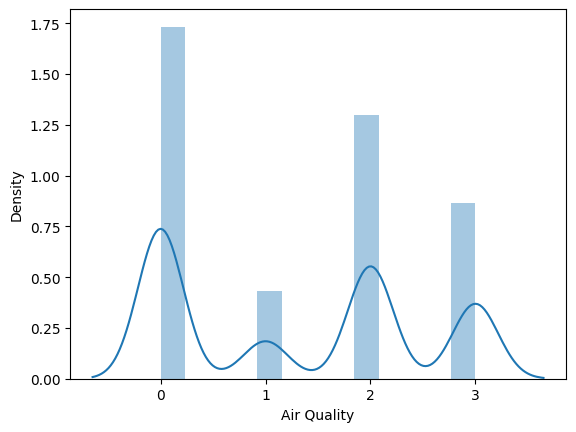

In [19]:
sns.distplot(df['Air Quality'])

<Axes: xlabel='Temperature'>

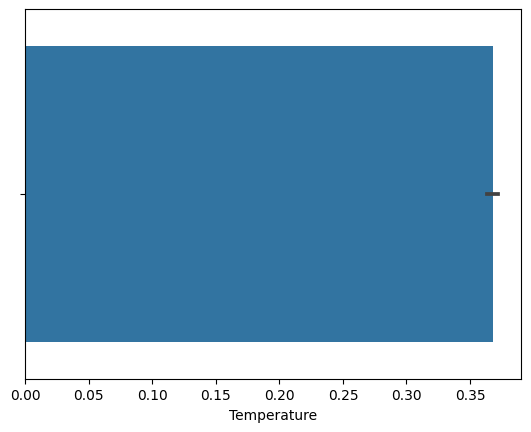

In [20]:
sns.barplot(x = df['Temperature'], hue = 'Air Quality', data = df)

<Axes: xlabel='Humidity'>

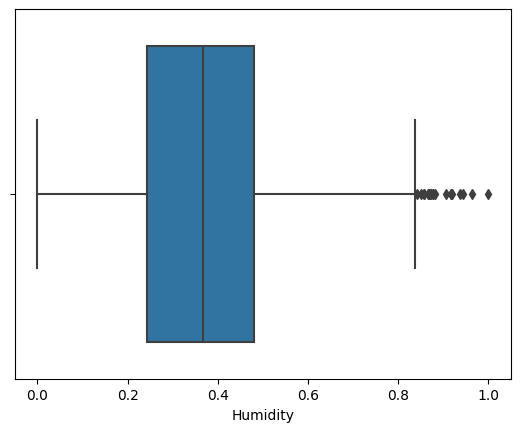

In [21]:
sns.boxplot(x = df['Humidity'], hue = 'Air Quality', data = df)

<ipython-input-22-1baf1144c782>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Humidity'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Humidity', ylabel='Density'>

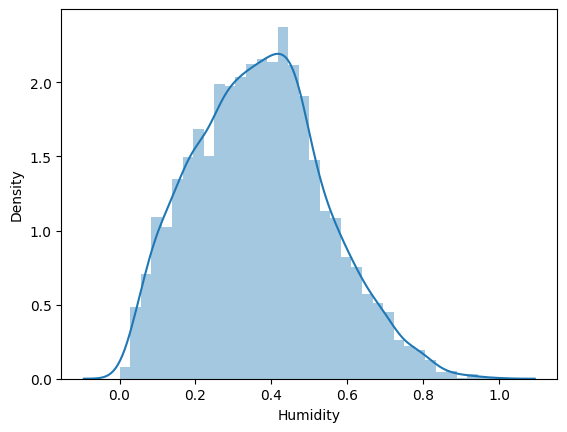

In [22]:
sns.distplot(df['Humidity'])

<Axes: xlabel='SO2', ylabel='count'>

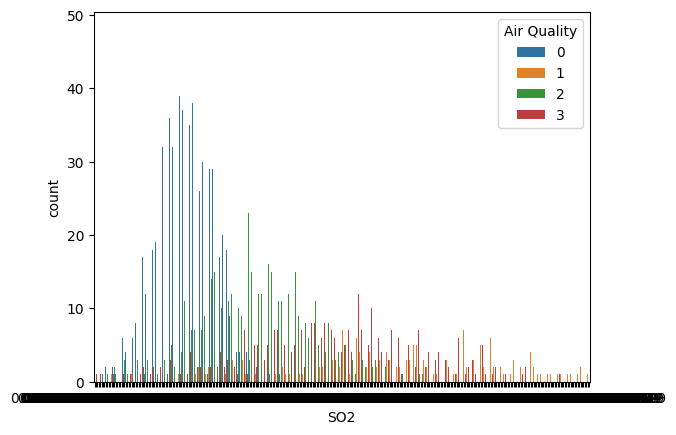

In [23]:
sns.countplot(x = df['SO2'], hue = 'Air Quality', data = df)

<Axes: xlabel='CO', ylabel='count'>

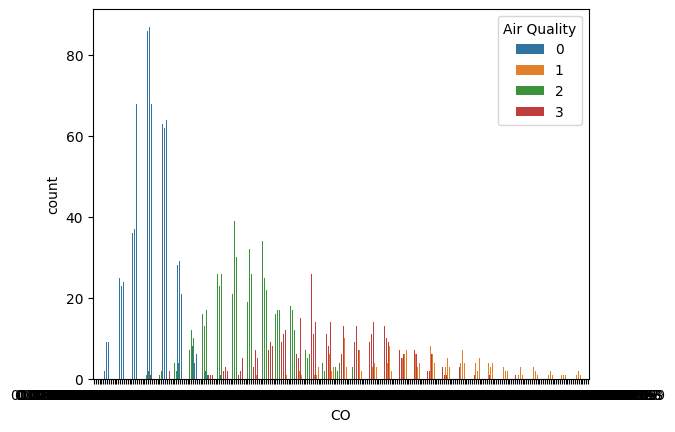

In [24]:
sns.countplot(x = df['CO'], hue = 'Air Quality', data = df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   float64
 9   Air Quality                    5000 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 390.8 KB


<Axes: xlabel='Population_Density', ylabel='count'>

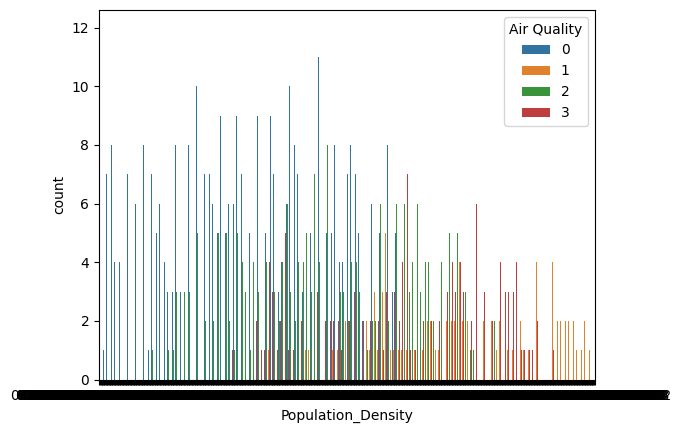

In [26]:
sns.countplot(x = df['Population_Density'], hue = 'Air Quality', data = df)

<Axes: xlabel='Proximity_to_Industrial_Areas', ylabel='count'>

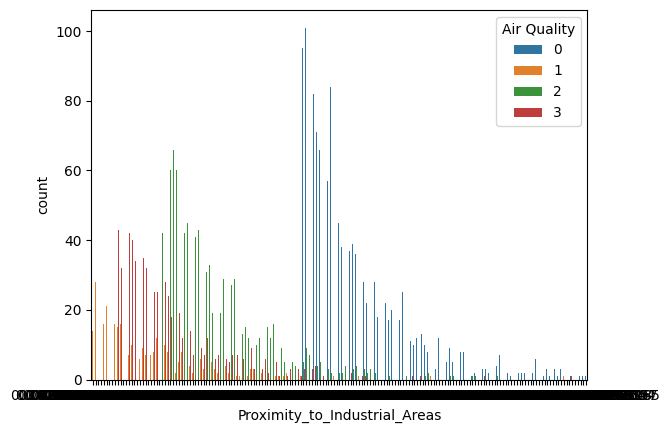

In [27]:
sns.countplot(x = df['Proximity_to_Industrial_Areas'], hue = 'Air Quality', data = df)

<Axes: xlabel='NO2', ylabel='count'>

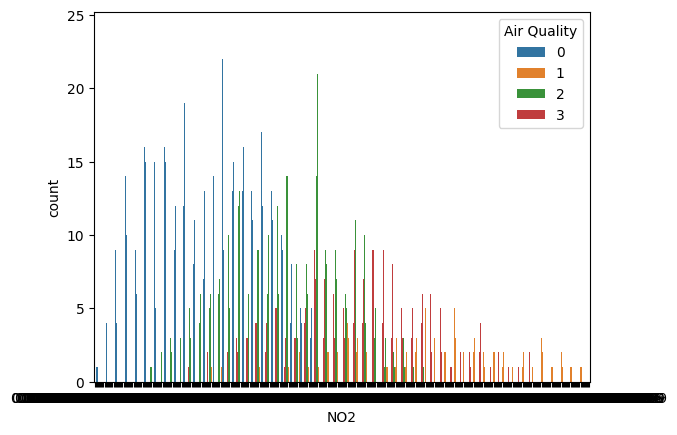

In [28]:
sns.countplot(x = df['NO2'], hue = 'Air Quality', data = df)

In [29]:
x = df.drop('Air Quality', axis = 1)
y = df['Air Quality']

In [30]:
x.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,0.362832,0.250814,0.017627,0.057278,0.200000,0.301370,0.348534,0.163090,0.170351
1,0.329646,0.429967,0.007797,0.039241,0.406957,0.311155,0.322476,0.150215,0.550065
2,0.214602,0.420195,0.090508,0.107595,0.295652,0.367906,0.319218,0.115880,0.560468
3,0.303097,0.033659,0.020678,0.020570,0.106087,0.225049,0.162866,0.369099,0.472042
4,0.289823,0.376764,0.023390,0.051266,0.252174,0.230920,0.117264,0.437768,0.149545


In [31]:
y.value_counts()

Air Quality
0    2000
2    1500
3    1000
1     500
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [34]:
xtrain.shape

(3500, 9)

In [35]:
xtest.shape

(1500, 9)

## Making Prediction with RandomForest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [38]:
y_pred = rfc.predict(xtest)

In [39]:
rfc.score(xtest, ytest)

0.9506666666666667

## checking some metrics

In [40]:
from sklearn.metrics import *

In [41]:
acs = accuracy_score(ytest, y_pred)
print(f'Accuracy Score: {acs}')
ps = precision_score(ytest, y_pred, average='micro')
print(f'precision Score: {ps}')
rs = recall_score(ytest, y_pred, average='micro')
print(f'recall Score: {rs}')
f1s = f1_score(ytest, y_pred, average='micro')
print(f'f1 Score: {f1s}')

Accuracy Score: 0.9506666666666667
precision Score: 0.9506666666666667
recall Score: 0.9506666666666667
f1 Score: 0.9506666666666667


In [42]:
classification_report(ytest, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       618\n           1       0.89      0.84      0.86       148\n           2       0.96      0.96      0.96       452\n           3       0.86      0.88      0.87       282\n\n    accuracy                           0.95      1500\n   macro avg       0.93      0.92      0.92      1500\nweighted avg       0.95      0.95      0.95      1500\n'

In [43]:
cm = confusion_matrix(ytest, y_pred)
cm

array([[618,   0,   0,   0],
       [  0, 124,   1,  23],
       [  0,   0, 436,  16],
       [  0,  16,  18, 248]])

<Axes: >

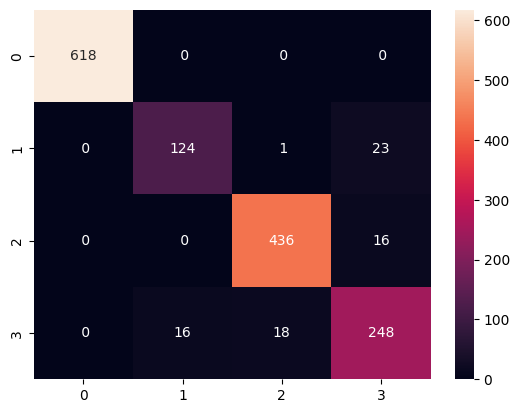

In [44]:
sns.heatmap(cm, annot = True, fmt = '2')